In [1]:
import os 
import pandas as pd

from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
from collections import Counter
import seaborn as sn
import random
import matplotlib.pyplot as plt

import numpy as np

In [2]:
lot_df = pd.read_csv('lottery_data_results.csv', index_col=False)
ny_df = pd.read_csv('ny_data_results.csv', index_col=False)
mar_df = pd.read_csv('mar_data_results.csv', index_col=False)
youngest_df = pd.read_csv('youngest_data_results.csv', index_col=False)
sickest_df = pd.read_csv('sickest_data_results.csv', index_col=False)
max_lives_df = pd.read_csv('max_lives_data_results.csv', index_col=False)

### Hispanic

In [3]:
def percent_diff(row):
    return ( (row.death_counts - row.lag_counts) / row.death_counts  ) * 100

def absolute_deviation(median, row):
    return abs(median - row.difference)
def modified_zscore(median, row):
    return (0.6745 * (row.difference - median)) / row.MAD

In [4]:
all_df_list = []

#### Lottery

In [5]:
race_var  = 'Hispanic'
hispanic_df = lot_df[lot_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Lottery'


med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
6,Hispanic,233.000,0.0,487.000,75.404531,NaN,219.091,13.909,5.969528,Lottery,7.027,2.3925,-1.981071,0
14,Hispanic,219.091,0.1,437.899,70.903236,NaN,198.036,21.055,9.610162,Lottery,0.119,2.3925,0.033549,0
22,Hispanic,198.036,0.2,400.117,64.089320,NaN,180.288,17.748,8.962007,Lottery,3.188,2.3925,-0.898769,0
31,Hispanic,180.288,0.3,360.875,58.345631,NaN,159.695,20.593,11.422280,Lottery,0.343,2.3925,-0.096699,0
38,Hispanic,159.695,0.4,318.644,51.681230,NaN,132.586,27.109,16.975485,Lottery,6.173,2.3925,1.740309,0
47,Hispanic,132.586,0.5,272.878,42.908091,NaN,107.858,24.728,18.650536,Lottery,3.792,2.3925,1.069051,0
54,Hispanic,107.858,0.6,222.977,34.905502,NaN,87.041,20.817,19.300376,Lottery,0.119,2.3925,-0.033549,0
64,Hispanic,87.041,0.7,177.051,28.168608,NaN,58.064,28.977,33.291208,Lottery,8.041,2.3925,2.266940,0
70,Hispanic,58.064,0.8,124.517,18.790939,NaN,37.652,20.412,35.154312,Lottery,0.524,2.3925,-0.147727,0
80,Hispanic,37.652,0.9,74.190,12.185113,NaN,15.119,22.533,59.845427,Lottery,1.597,2.3925,0.450231,0


#### New York

In [6]:
hispanic_df = ny_df[ny_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'New York'

med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
7,Hispanic,233.000,0.0,487.000,75.404531,NaN,205.816,27.184,11.666953,New York,7.0185,1.916,2.470761,0
15,Hispanic,205.816,0.1,433.050,66.607120,NaN,176.833,28.983,14.081996,New York,8.8175,1.916,3.104073,0
24,Hispanic,176.833,0.2,378.396,57.227508,NaN,149.988,26.845,15.180990,New York,6.6795,1.916,2.351421,0
31,Hispanic,149.988,0.3,324.595,48.539806,NaN,130.003,19.985,13.324399,New York,0.1805,1.916,-0.063542,0
39,Hispanic,130.003,0.4,279.014,42.072168,NaN,108.254,21.749,16.729614,New York,1.5835,1.916,0.557448,0
48,Hispanic,108.254,0.5,233.655,35.033657,NaN,91.074,17.180,15.870083,New York,2.9855,1.916,-1.051002,0
54,Hispanic,91.074,0.6,191.496,29.473786,NaN,71.812,19.262,21.149834,New York,0.9035,1.916,-0.318064,0
62,Hispanic,71.812,0.7,149.028,23.240129,NaN,53.360,18.452,25.694870,New York,1.7135,1.916,-0.603213,0
72,Hispanic,53.360,0.8,104.948,17.268608,NaN,33.014,20.346,38.129685,New York,0.1805,1.916,0.063542,0
78,Hispanic,33.014,0.9,67.037,10.684142,NaN,14.967,18.047,54.664688,New York,2.1185,1.916,-0.745787,0


#### Maryland

In [7]:
hispanic_df = mar_df[mar_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Maryland'

med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
8,Hispanic,233.000,0.0,487.000,75.404531,NaN,205.202,27.798,11.930472,Maryland,6.662,2.0595,2.181849,0
15,Hispanic,205.202,0.1,432.379,66.408414,NaN,184.376,20.826,10.149024,Maryland,0.310,2.0595,-0.101527,0
23,Hispanic,184.376,0.2,379.791,59.668608,NaN,151.929,32.447,17.598277,Maryland,11.311,2.0595,3.704428,1
32,Hispanic,151.929,0.3,330.041,49.167961,NaN,130.483,21.446,14.115804,Maryland,0.310,2.0595,0.101527,0
39,Hispanic,130.483,0.4,288.334,42.227508,NaN,111.985,18.498,14.176559,Maryland,2.638,2.0595,-0.863963,0
47,Hispanic,111.985,0.5,243.638,36.241100,NaN,94.660,17.325,15.470822,Maryland,3.811,2.0595,-1.248128,0
55,Hispanic,94.660,0.6,208.782,30.634304,NaN,74.945,19.715,20.827171,Maryland,1.421,2.0595,-0.465387,0
65,Hispanic,74.945,0.7,157.018,24.254045,NaN,53.446,21.499,28.686370,Maryland,0.363,2.0595,0.118885,0
70,Hispanic,53.446,0.8,106.540,17.296440,NaN,37.638,15.808,29.577517,Maryland,5.328,2.0595,-1.744956,0
80,Hispanic,37.638,0.9,72.091,12.180583,NaN,15.021,22.617,60.090866,Maryland,1.481,2.0595,0.485037,0


#### Youngest

In [8]:
hispanic_df = youngest_df[youngest_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Youngest First'

med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
6,Hispanic,233.000,0.0,487.000,75.404531,NaN,217.262,15.738,6.754506,Youngest First,6.8535,3.2215,-1.434948,0
15,Hispanic,217.262,0.1,449.971,70.311327,NaN,194.573,22.689,10.443152,Youngest First,0.0975,3.2215,0.020414,0
25,Hispanic,194.573,0.2,406.845,62.968608,NaN,173.357,21.216,10.903877,Youngest First,1.3755,3.2215,-0.287995,0
30,Hispanic,173.357,0.3,363.732,56.102589,NaN,159.744,13.613,7.852582,Youngest First,8.9785,3.2215,-1.879869,0
39,Hispanic,159.744,0.4,326.387,51.697087,NaN,133.253,26.491,16.583408,Youngest First,3.8995,3.2215,0.816456,0
47,Hispanic,133.253,0.5,282.179,43.123948,NaN,113.532,19.721,14.799667,Youngest First,2.8705,3.2215,-0.601010,0
54,Hispanic,113.532,0.6,242.113,36.741748,NaN,90.189,23.343,20.560723,Youngest First,0.7515,3.2215,0.157345,0
64,Hispanic,90.189,0.7,193.757,29.187379,NaN,63.836,26.353,29.219750,Youngest First,3.7615,3.2215,0.787562,0
70,Hispanic,63.836,0.8,141.023,20.658900,NaN,41.342,22.494,35.237170,Youngest First,0.0975,3.2215,-0.020414,0
79,Hispanic,41.342,0.9,90.302,13.379288,NaN,15.178,26.164,63.286730,Youngest First,3.5725,3.2215,0.747990,0


#### Max Life Years

In [9]:
hispanic_df = max_lives_df[max_lives_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Max Life Years'

med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
9,Hispanic,233.000,0.0,487.000,75.404531,NaN,206.195,26.805,11.504292,Max Life Years,5.036,2.9235,1.161889,0
14,Hispanic,206.195,0.1,432.386,66.729773,NaN,180.399,25.796,12.510488,Max Life Years,4.027,2.9235,0.929096,0
23,Hispanic,180.399,0.2,382.825,58.381553,NaN,151.048,29.351,16.270046,Max Life Years,7.582,2.9235,1.749293,0
32,Hispanic,151.048,0.3,330.027,48.882848,NaN,127.742,23.306,15.429532,Max Life Years,1.537,2.9235,0.354611,0
41,Hispanic,127.742,0.4,288.270,41.340453,NaN,116.952,10.790,8.446713,Max Life Years,10.979,2.9235,-2.533038,0
47,Hispanic,116.952,0.5,252.318,37.848544,NaN,97.472,19.480,16.656406,Max Life Years,2.289,2.9235,-0.528110,0
55,Hispanic,97.472,0.6,212.753,31.544337,NaN,76.822,20.650,21.185571,Max Life Years,1.119,2.9235,-0.258172,0
63,Hispanic,76.822,0.7,162.949,24.861489,NaN,54.192,22.630,29.457707,Max Life Years,0.861,2.9235,0.198647,0
72,Hispanic,54.192,0.8,108.336,17.537864,NaN,35.981,18.211,33.604591,Max Life Years,3.558,2.9235,-0.820890,0
78,Hispanic,35.981,0.9,72.093,11.644337,NaN,15.073,20.908,58.108446,Max Life Years,0.861,2.9235,-0.198647,0


#### Sickest First

In [10]:
hispanic_df = sickest_df[sickest_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Sickest First'


med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
6,Hispanic,233.000,0.0,487.000,75.404531,NaN,210.432,22.568,9.685837,Sickest First,2.3855,2.412,0.667089,0
14,Hispanic,210.432,0.1,454.482,68.100971,NaN,196.678,13.754,6.536078,Sickest First,6.4285,2.412,-1.797688,0
22,Hispanic,196.678,0.2,413.206,63.649838,NaN,178.225,18.453,9.382341,Sickest First,1.7295,2.412,-0.483643,0
32,Hispanic,178.225,0.3,369.298,57.677994,NaN,153.609,24.616,13.811755,Sickest First,4.4335,2.412,1.239799,0
39,Hispanic,153.609,0.4,319.314,49.711650,NaN,134.474,19.135,12.456952,Sickest First,1.0475,2.412,-0.292927,0
46,Hispanic,134.474,0.5,280.011,43.519094,NaN,116.730,17.744,13.195116,Sickest First,2.4385,2.412,-0.681911,0
54,Hispanic,116.730,0.6,234.317,37.776699,NaN,96.096,20.634,17.676690,Sickest First,0.4515,2.412,0.126259,0
62,Hispanic,96.096,0.7,190.084,31.099029,NaN,70.537,25.559,26.597361,Sickest First,5.3765,2.412,1.503503,0
73,Hispanic,70.537,0.8,142.671,22.827508,NaN,50.806,19.731,27.972553,Sickest First,0.4515,2.412,-0.126259,0
80,Hispanic,50.806,0.9,91.131,16.442071,NaN,14.957,35.849,70.560564,Sickest First,15.6665,2.412,4.381034,1


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Difference Plot For White Patients')

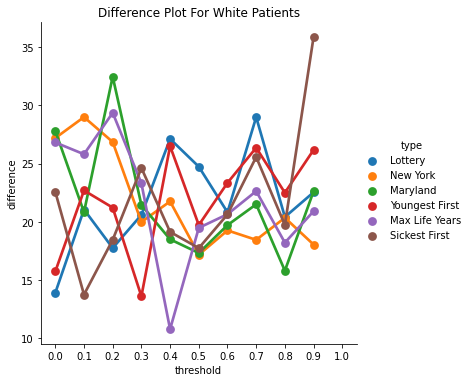

In [11]:
all_df = pd.concat(all_df_list)
type_labels = all_df['type'].unique()
sn_plot = sn.factorplot(x='threshold', y='difference', 
                        hue_order = type_labels, hue='type', data=all_df)
plt.title('Difference Plot For White Patients')

In [12]:
all_df[all_df['type'] == 'Lottery']

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
6,Hispanic,233.000,0.0,487.000,75.404531,NaN,219.091,13.909,5.969528,Lottery,7.027,2.3925,-1.981071,0
14,Hispanic,219.091,0.1,437.899,70.903236,NaN,198.036,21.055,9.610162,Lottery,0.119,2.3925,0.033549,0
22,Hispanic,198.036,0.2,400.117,64.089320,NaN,180.288,17.748,8.962007,Lottery,3.188,2.3925,-0.898769,0
31,Hispanic,180.288,0.3,360.875,58.345631,NaN,159.695,20.593,11.422280,Lottery,0.343,2.3925,-0.096699,0
38,Hispanic,159.695,0.4,318.644,51.681230,NaN,132.586,27.109,16.975485,Lottery,6.173,2.3925,1.740309,0
47,Hispanic,132.586,0.5,272.878,42.908091,NaN,107.858,24.728,18.650536,Lottery,3.792,2.3925,1.069051,0
54,Hispanic,107.858,0.6,222.977,34.905502,NaN,87.041,20.817,19.300376,Lottery,0.119,2.3925,-0.033549,0
64,Hispanic,87.041,0.7,177.051,28.168608,NaN,58.064,28.977,33.291208,Lottery,8.041,2.3925,2.266940,0
70,Hispanic,58.064,0.8,124.517,18.790939,NaN,37.652,20.412,35.154312,Lottery,0.524,2.3925,-0.147727,0
80,Hispanic,37.652,0.9,74.190,12.185113,NaN,15.119,22.533,59.845427,Lottery,1.597,2.3925,0.450231,0


Text(0.5, 1.0, 'Difference Plot For White Patients Lottery')

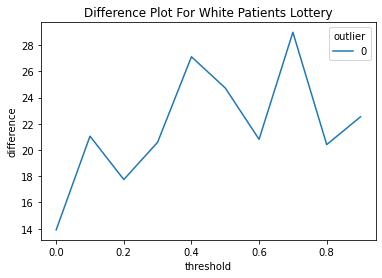

In [13]:
type_labels = all_df['type'].unique()
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Lottery'])
plt.title('Difference Plot For White Patients Lottery')

Text(0.5, 1.0, 'Difference Plot For White Patients New York')

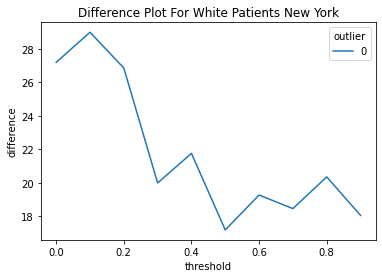

In [14]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'New York'])
plt.title('Difference Plot For White Patients New York')

Text(0.5, 1.0, 'Difference Plot For White Patients Maryland')

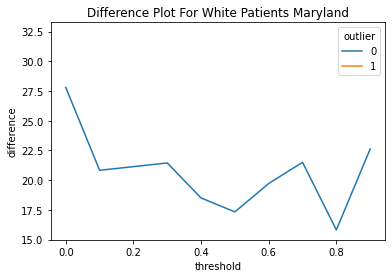

In [15]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Maryland'])
plt.title('Difference Plot For White Patients Maryland')

Text(0.5, 1.0, 'Difference Plot For White Patients Youngest First')

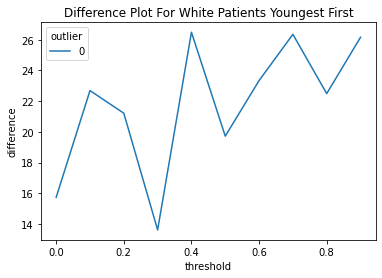

In [16]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Youngest First'])
plt.title('Difference Plot For White Patients Youngest First')

Text(0.5, 1.0, 'Difference Plot For White Patients Max Life Years')

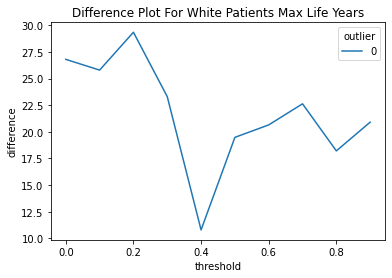

In [17]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Max Life Years'])
plt.title('Difference Plot For White Patients Max Life Years')

Text(0.5, 1.0, 'Difference Plot For White Patients Sickest First')

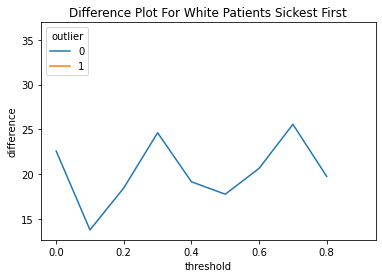

In [18]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Sickest First'])
plt.title('Difference Plot For White Patients Sickest First')